In [6]:
import numpy as np
from matplotlib import pyplot as plt
from ncon import ncon
import colorsys
import CTMRG_better_4 as CTM
from numpy.linalg import norm, svd


plt.rcParams['figure.figsize'] = [20,12]
dirs = ['./BH-NTU4-CTM4-nowenowe_12_3_1.0_4.9_0.005_100','./BH-NTU4-CTM4-nowenowe_16_4_1.0_4.9_0.005_100','./BH-NTU4-CTM4-nowenowe_20_5_1.0_4.9_0.005_100','./BH-NTU4-CTM4-nowenowe_24_6_1.0_4.9_0.005_100','./BH-NTU4-CTM4-nowenowe_28_7_1.0_4.9_0.005_100','./BH-NTU4-CTM4-nowenowe_32_8_1.0_4.9_0.005_100','./BH-NTU4-CTM4-nowenowe_36_9_1.0_4.9_0.005_100']

In [7]:
env = dict(np.load(dirs[0]+'/RHOA_00001.npz'))
print(env['names1'])
print(env['names2'])

['N' 'NN']
['AhA' 'AAh' 'NN']


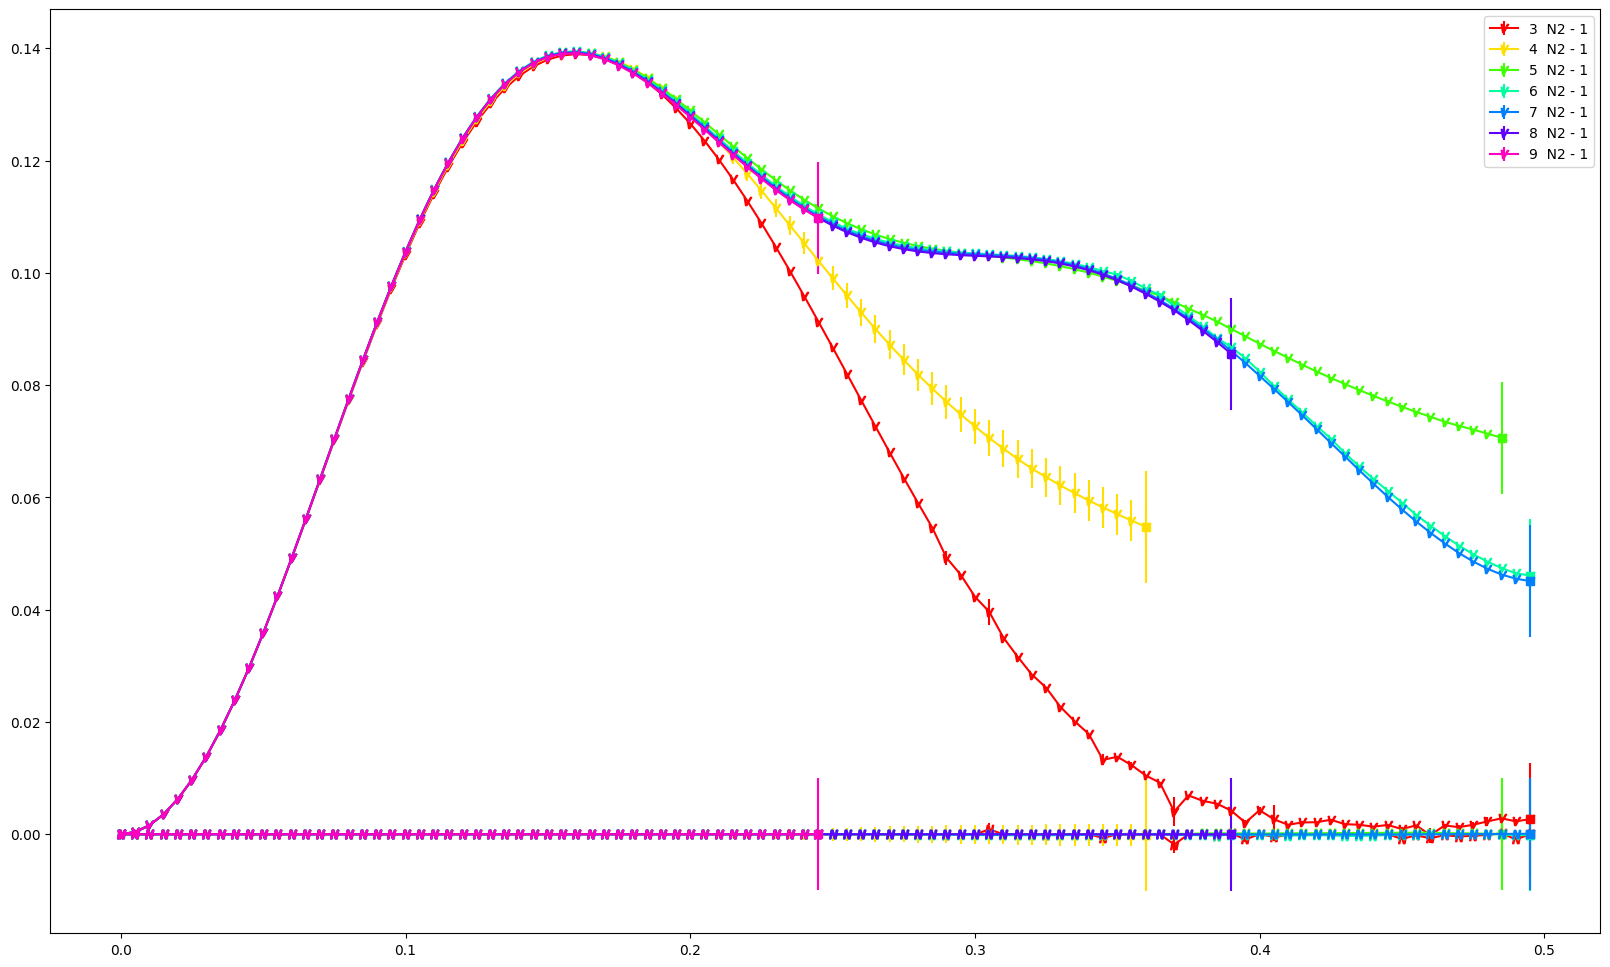

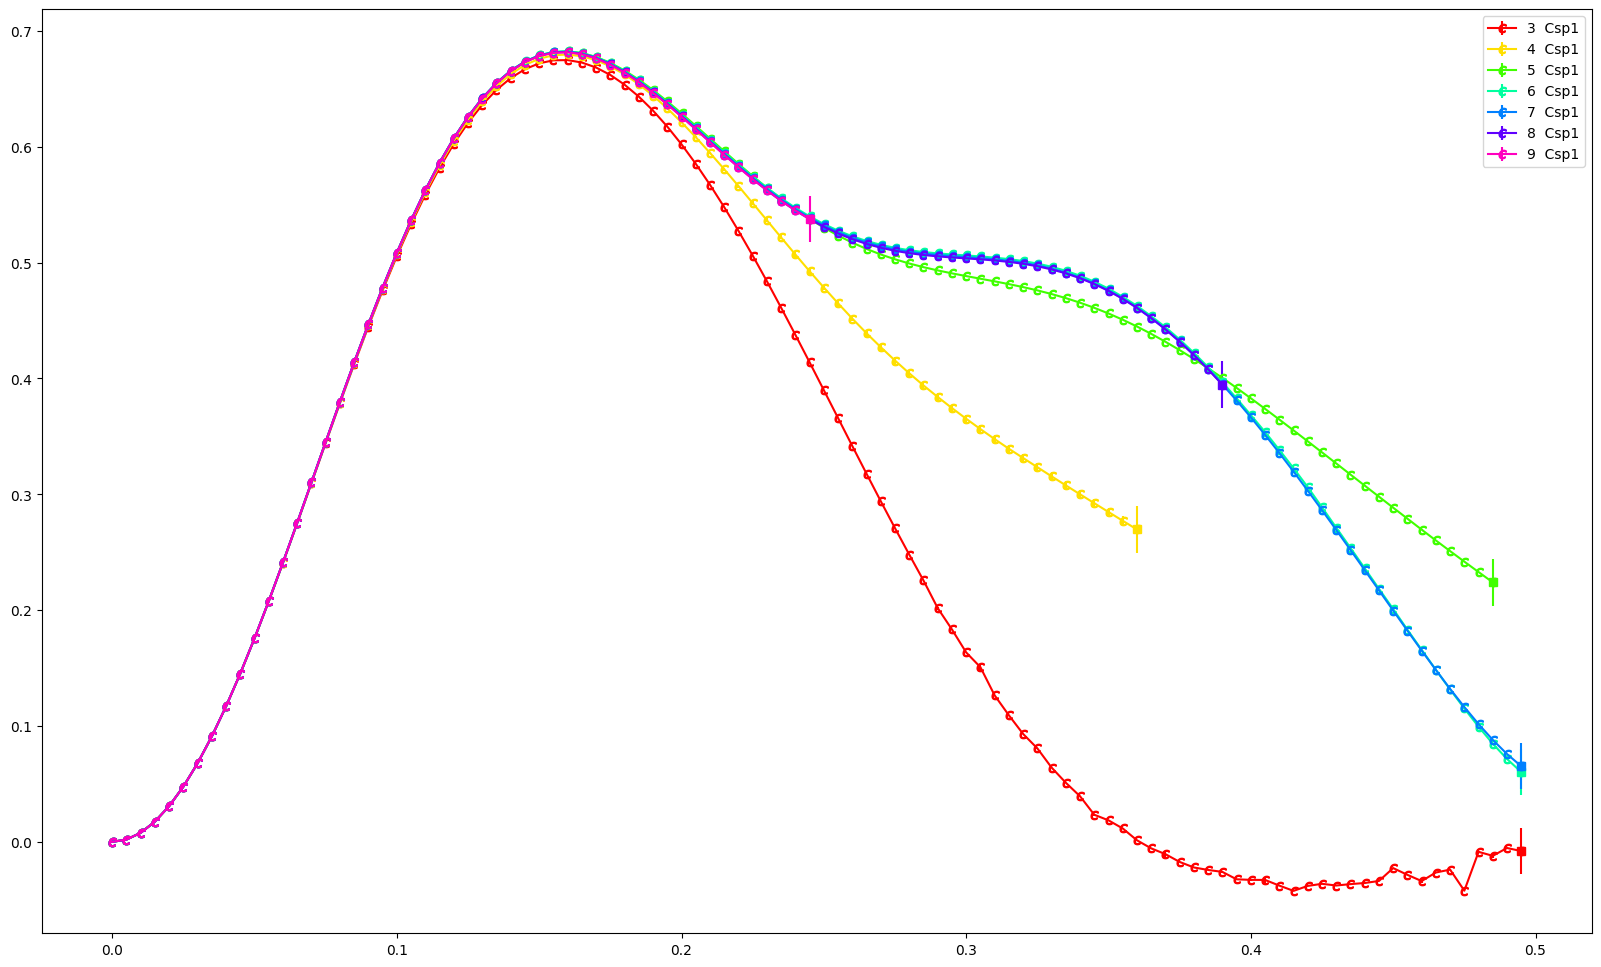

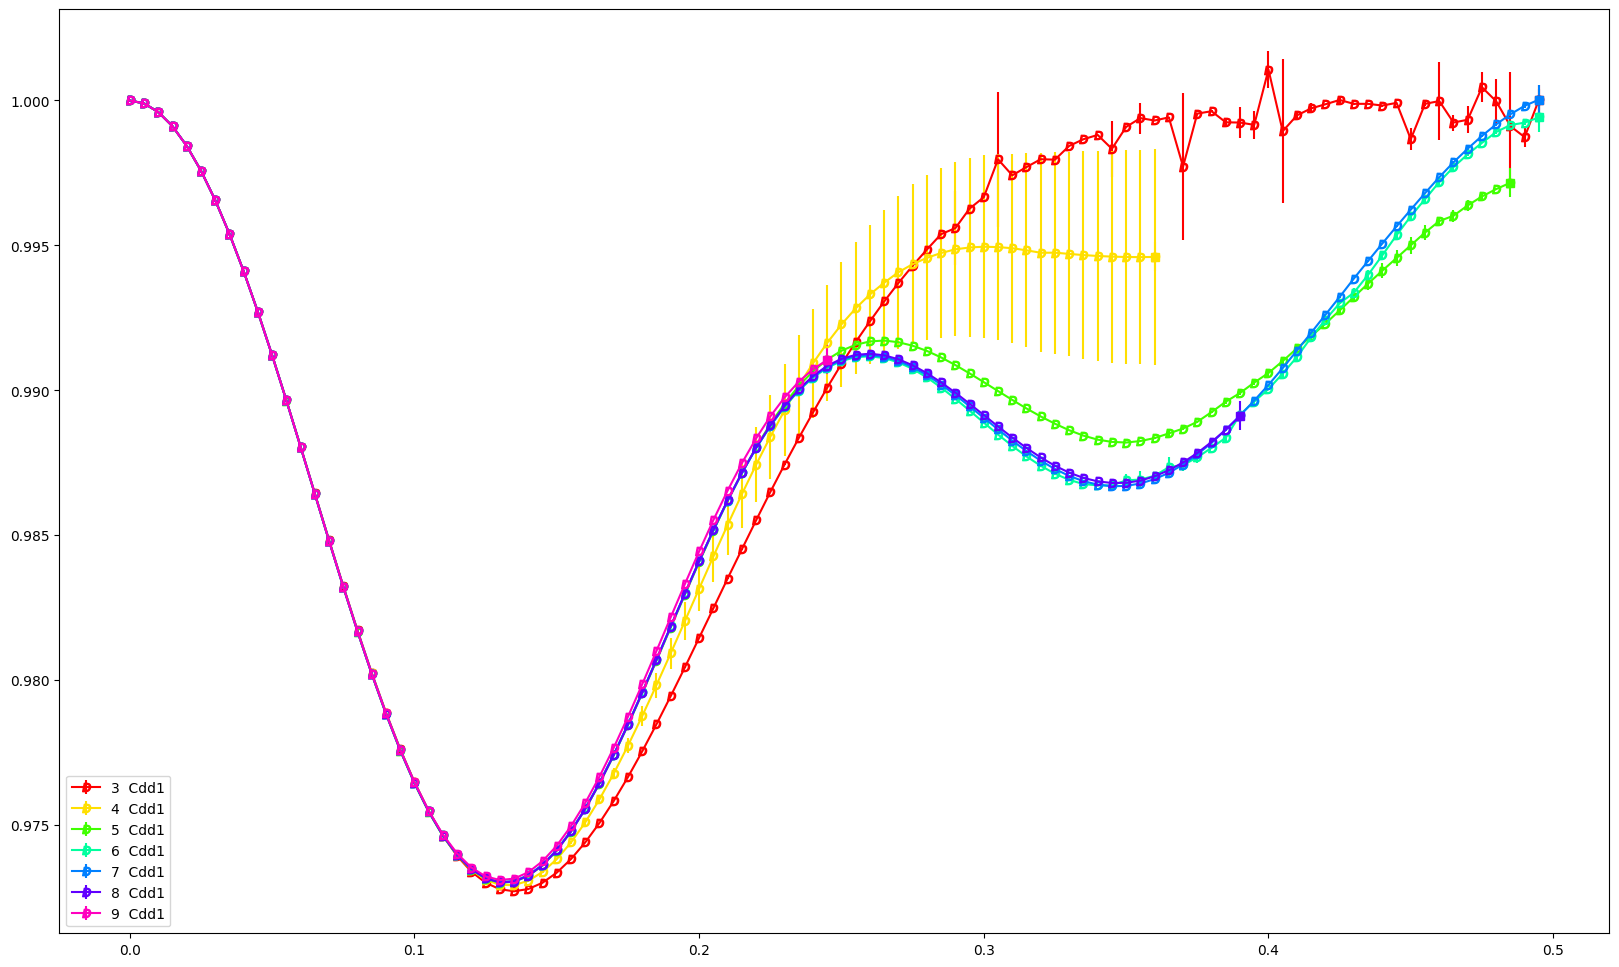

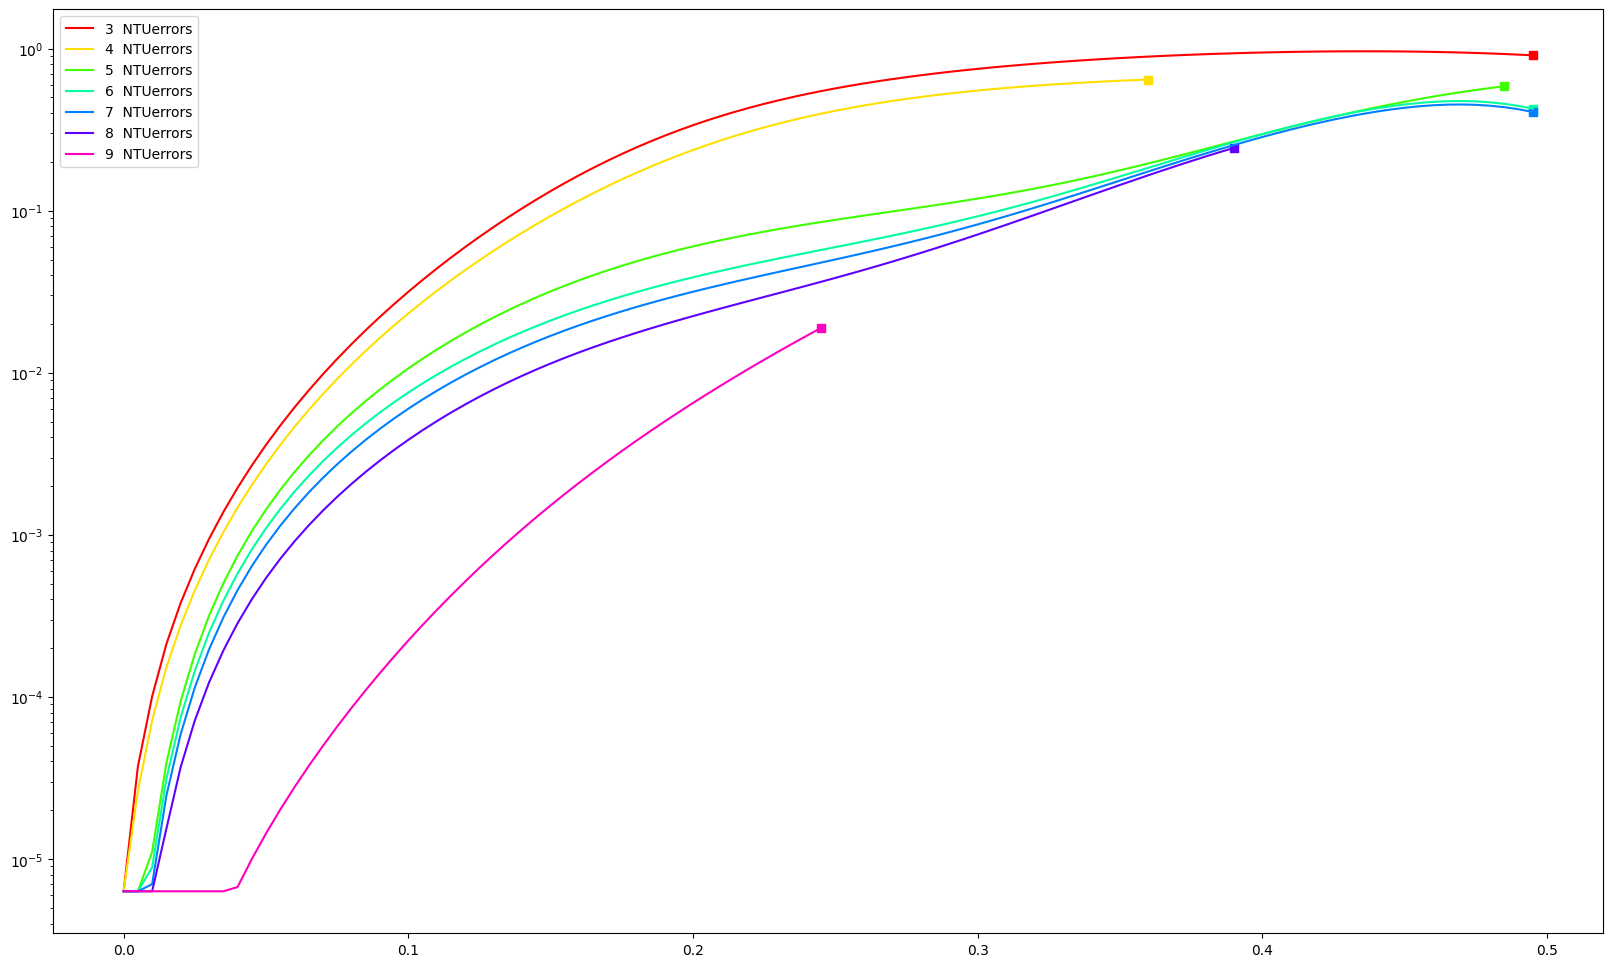

In [8]:
figN, axN = plt.subplots()
figC, axC = plt.subplots()
figD, axD = plt.subplots()
figE, axE = plt.subplots()

# for D in range(5,9):
#     f = open("./dat_open(1)/dat_open/sudden_quench_peps/dat_U19.6_D"+str(D)+"_mu0.371/dat_grep_adaga","r")
#     lines = f.readlines()
#     data = []
#     maxit, itt = 17, 0
#     for l in lines:
#         itt+=1
#         ll=l[:-1].split(' ')
#         data.append([float(ll[0]),float(ll[6])])
#         if itt>maxit:break
#     data = np.array(data).T
#     # ds = np.array(ds).T
#     axC.scatter(data[0]*0.005,2*data[1],label=str(D),marker='o')

colors = [colorsys.hsv_to_rgb(x,1,1) for x in np.linspace(0,7/8,7,endpoint=True)]
for n,dir in enumerate(dirs):
    ts, OP_N1, OP_N2, OP_NN, OP_AHA, OP_AAH, NTUerrs = [], [], [], [], [], [], []

    try:
        SPECS = dict(np.load(dir + '/SPECS.npz'))
    except: continue
    D = SPECS['D']
    for i in range(SPECS['n']):
        try:
            PEPS = dict(np.load(dir+'/PEPS_{:05}.npz'.format(i)))
            env = dict(np.load(dir+'/RHOA_{:05}.npz'.format(i)))
        except: continue
        if PEPS['iter'] * PEPS['dt'] > 0.5: break
        ts.append(PEPS['iter'] * PEPS['dt'])
        OP_N1.append(env['vals1'][0])
        OP_N2.append(env['vals1'][1])
        OP_NN.append(env['vals2'][2])
        OP_AHA.append(env['vals2'][0])
        OP_AAH.append(env['vals2'][1])
        NTUerrs.append(PEPS['NTUerror'])

    ts = np.array(ts)
    OP_N1 = np.array(OP_N1)
    OP_N2 = np.array(OP_N2)
    OP_NN = np.array(OP_NN)
    OP_AHA = np.array(OP_AHA)
    OP_AAH = np.array(OP_AAH)
    OP_AA = OP_AAH + OP_AHA
    NTUerrs = np.where(np.array(NTUerrs) < 1e-15, 1e-15,np.array(NTUerrs))

    axN.errorbar(ts,np.mean(OP_N2, axis=1)-1,np.std(OP_N2, axis=1),label = str(D) + '  N2 - 1', marker='$V$',color=colors[n])
    axN.errorbar(ts[-1], np.mean(OP_N2, axis=1)[-1]-1, 0.01, marker='s', color=colors[n])
    axN.errorbar(ts,np.mean(OP_N1, axis=1)-1,np.std(OP_N1, axis=1), marker='$N$',color=colors[n])
    axN.errorbar(ts[-1], np.mean(OP_N1, axis=1)[-1]-1, 0.01, marker='s', color=colors[n])

    axC.errorbar(ts,np.mean(OP_AA, axis=1),np.std(OP_N2, axis=1),label = str(D) + '  Csp1', marker='$C$',color=colors[n])
    axC.errorbar(ts[-1],np.mean(OP_AA, axis=1)[-1], 0.02, marker='s',color=colors[n])

    axD.errorbar(ts,np.mean(OP_NN, axis=1),np.std(OP_N2, axis=1),label = str(D) + '  Cdd1', marker='$D$',color=colors[n])
    axD.errorbar(ts[-1],np.mean(OP_NN, axis=1)[-1], 0.0005, marker='s',color=colors[n])

    axE.plot(ts,np.sqrt(NTUerrs)/0.005, color=colors[n], label = str(D) + "  NTUerrors")
    axE.scatter(ts[-1],np.sqrt(NTUerrs[-1])/0.005, color=colors[n], marker = 's')
    axE.set_yscale('log')

axN.legend()
axC.legend()
axD.legend()
axE.legend()
# figN.show()
# figC.show()
# figD.show()
# figE.show()

/tmp/ipykernel_14003/2583293582.py:50: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


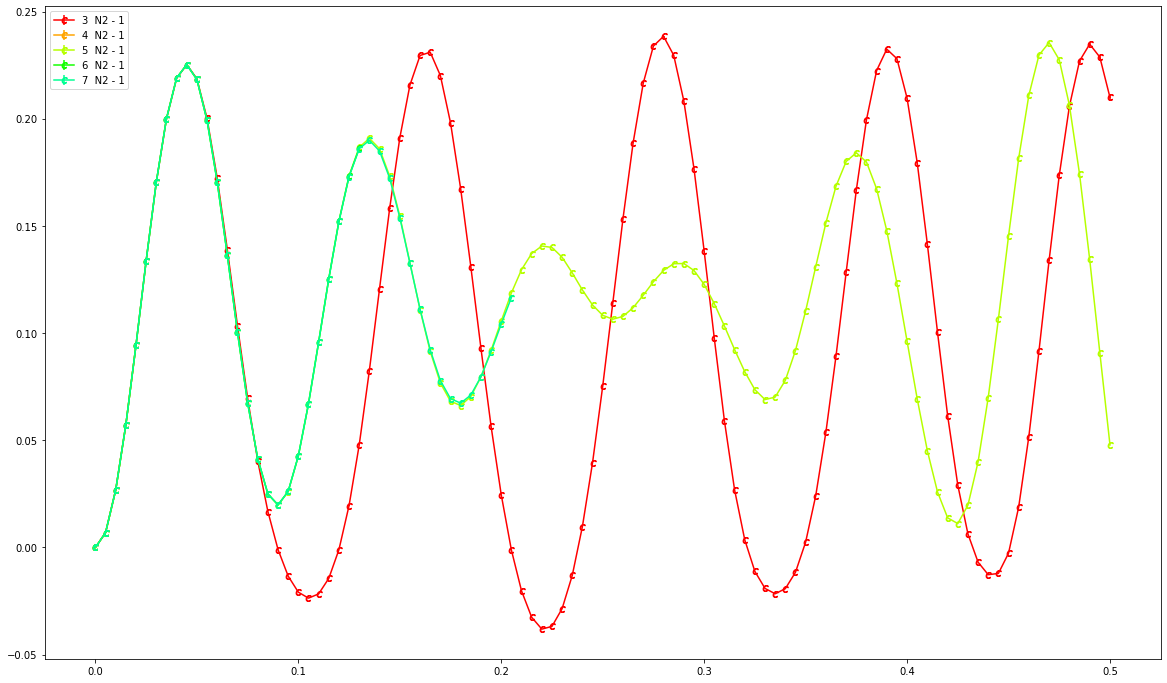

In [36]:
fig, ax = plt.subplots()

for D in range(5,9):
    f = open("./dat_open(1)/dat_open/sudden_quench_peps/dat_U70.0_D"+str(D)+"_mu0.371/dat_grep_adaga","r")
    lines = f.readlines()
    data = []
    maxit, itt = 17, 0
    for l in lines:
        itt+=1
        ll=l[:-1].split(' ')
        data.append([float(ll[0]),float(ll[6])])
        if itt>maxit:break
    data = np.array(data).T
    # ds = np.array(ds).T
    # plt.plot(data[0]*0.005,2*data[1],label=str(D),marker='x')

colors = [(colorsys.hsv_to_rgb(x,1,1)) for x in np.linspace(0,6/8,8,endpoint=True)]
for n,dir in enumerate(dirs):
    ts, OP_N1, OP_N2, OP_NN, OP_AHA, OP_AAH = [], [], [], [], [], []

    try:
        SPECS = dict(np.load(dir + '/SPECS.npz'))
    except: continue
    D = SPECS['D']
    for i in range(SPECS['n']):
        try:
            PEPS = dict(np.load(dir+'/PEPS_{:05}.npz'.format(i)))
            env = dict(np.load(dir+'/RHOA_{:05}.npz'.format(i)))
        except: continue
        if PEPS['iter'] * PEPS['dt'] > 0.5: break
        ts.append(PEPS['iter'] * PEPS['dt'])
        OP_N1.append(env['vals1'][0])
        OP_N2.append(env['vals1'][1])
        OP_NN.append(env['vals2'][2])
        OP_AHA.append(env['vals2'][0])
        OP_AAH.append(env['vals2'][1])

    ts = np.array(ts)
    OP_N1 = np.array(OP_N1)
    OP_N2 = np.array(OP_N2)
    OP_NN = np.array(OP_NN)
    OP_AHA = np.array(OP_AHA)
    OP_AAH = np.array(OP_AAH)
    OP_AA = OP_AAH + OP_AHA

    # ax.errorbar(ts,np.real_if_close(nA/2+nB/2-1),np.abs(nA-nB)/2, label = str(D) + '  N', marker='$N$',color=colors[n])
    ax.errorbar(ts,np.mean(OP_AA, axis=1),np.std(OP_N2, axis=1),label = str(D) + '  N2 - 1', marker='$C$',color=colors[n])
    # ax.errorbar(ts,2*np.mean(cor,axis=0),np.std(cor,axis=0),label = str(D) + '  Csp1', marker='$C$',color=colors[n])
ax.legend()
fig.show()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


KeyboardInterrupt: 

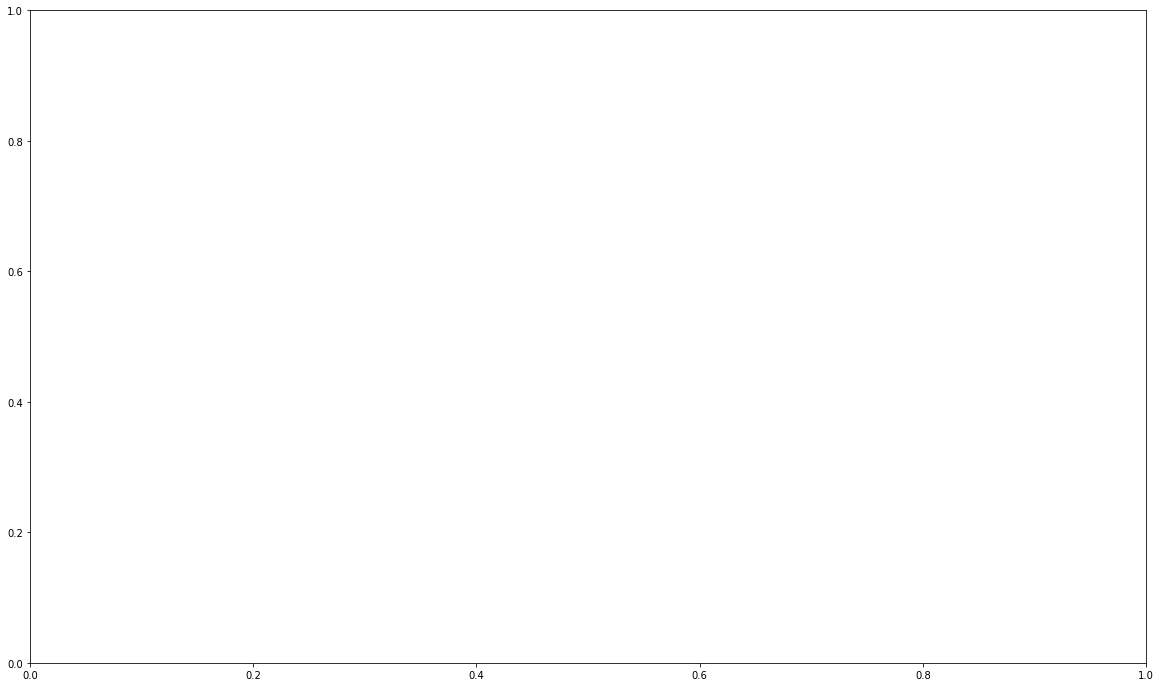

In [60]:
fig, ax = plt.subplots()
a,ah = np.diag(np.sqrt(np.arange(1,3)), k=1), np.diag(np.sqrt(np.arange(1,3)), k=-1)

colors = [(colorsys.hsv_to_rgb(x,1,1)) for x in np.linspace(0,0.5,4,endpoint=True)]
ts, nA, nnA, nB, nnB, OP_AA = [], [], [], [], [], []
cor_aah_ns_A,cor_aha_ns_A,cor_aah_we_A,cor_aha_we_A=[],[],[],[]
cor_aah_ns_B,cor_aha_ns_B,cor_aah_we_B,cor_aha_we_B=[],[],[],[]
for n,dir in enumerate(dirs):

    SPECS = dict(np.load(dir + '/SPECS.npz'))
    D = SPECS['D']
    if D != 6: continue
    for i in range(SPECS['n']):
        try:
            PEPS = dict(np.load(dir+'/PEPS_{:05}.npz'.format(i)))
            env = dict(np.load(dir+'/RHOA_{:05}.npz'.format(i)))
            cor_aah_ns = dict(np.load(dir+'/CORR_AAH_NS_{:05}.npz'.format(i)))
            cor_aha_ns = dict(np.load(dir+'/CORR_AHA_NS_{:05}.npz'.format(i)))
            cor_aah_we = dict(np.load(dir+'/CORR_AAH_WE_{:05}.npz'.format(i)))
            cor_aha_we = dict(np.load(dir+'/CORR_AHA_WE_{:05}.npz'.format(i)))
        except: continue
        if PEPS['iter'] * PEPS['dt'] > 0.5: break
        ts.append(PEPS['iter'] * PEPS['dt'])
        n1 = CTM.__CTMRG_Rho_11(env,PEPS['A'],PEPS['B'],PEPS['A'].conj(),PEPS['B'].conj(),np.eye(3),np.eye(3))
        OP_N = CTM.__CTMRG_Rho_11(env,PEPS['A'],PEPS['B'],PEPS['A'].conj(),PEPS['B'].conj(),np.diag([0,1,2]),np.diag([0,1,2])) / n1
        OP_NN = CTM.__CTMRG_Rho_11(env,PEPS['A'],PEPS['B'],PEPS['A'].conj(),PEPS['B'].conj(),np.diag([0,1,4]),np.diag([0,1,4])) / n1
        n2 = CTM.__CTMRG_Rho_21(env,PEPS['A'],PEPS['B'],PEPS['A'].conj(),PEPS['B'].conj(),np.eye(3),np.eye(3))
        OP_AA.append((CTM.__CTMRG_Rho_21(env,PEPS['A'],PEPS['B'],PEPS['A'].conj(),PEPS['B'].conj(),ah,a)+CTM.__CTMRG_Rho_21(env,PEPS['A'],PEPS['B'],PEPS['A'].conj(),PEPS['B'].conj(),a,ah)) / n2)
        print(i)

    ts = np.array(ts)
    OP_AA = np.array(OP_AA)
    cor = np.array([cor_aah_ns_A, cor_aah_ns_B, cor_aha_ns_A, cor_aha_ns_B, cor_aah_we_A, cor_aah_we_B, cor_aha_we_A, cor_aha_we_B])

    ax.plot(ts, OP_AA.T[0].real, label = str(D) + '  A NS', marker='.', ls=':')
    ax.plot(ts, OP_AA.T[1].real, label = str(D) + '  B NS', marker='.', ls=':')
    ax.plot(ts, OP_AA.T[2].real, label = str(D) + '  A WE', marker='.', ls=':')
    ax.plot(ts, OP_AA.T[3].real, label = str(D) + '  B WE', marker='.', ls=':')
ax.legend()
fig.show()

/tmp/ipykernel_8519/2091562843.py:5: RuntimeWarning: invalid value encountered in true_divide
  ax.plot((OP_AA.T[0].real - np.mean(OP_AA.T,axis=0).real) / (np.mean(OP_AA.T,axis=0).real), label = str(D) + '  A NS', marker='.', ls=':')
/tmp/ipykernel_8519/2091562843.py:6: RuntimeWarning: invalid value encountered in true_divide
  ax.plot((OP_AA.T[1].real - np.mean(OP_AA.T,axis=0).real) / (np.mean(OP_AA.T,axis=0).real), label = str(D) + '  B NS', marker='.', ls=':')
/tmp/ipykernel_8519/2091562843.py:7: RuntimeWarning: invalid value encountered in true_divide
  ax.plot((OP_AA.T[2].real - np.mean(OP_AA.T,axis=0).real) / (np.mean(OP_AA.T,axis=0).real), label = str(D) + '  A WE', marker='.', ls=':')
/tmp/ipykernel_8519/2091562843.py:8: RuntimeWarning: invalid value encountered in true_divide
  ax.plot((OP_AA.T[3].real - np.mean(OP_AA.T,axis=0).real) / (np.mean(OP_AA.T,axis=0).real), label = str(D) + '  B WE', marker='.', ls=':')


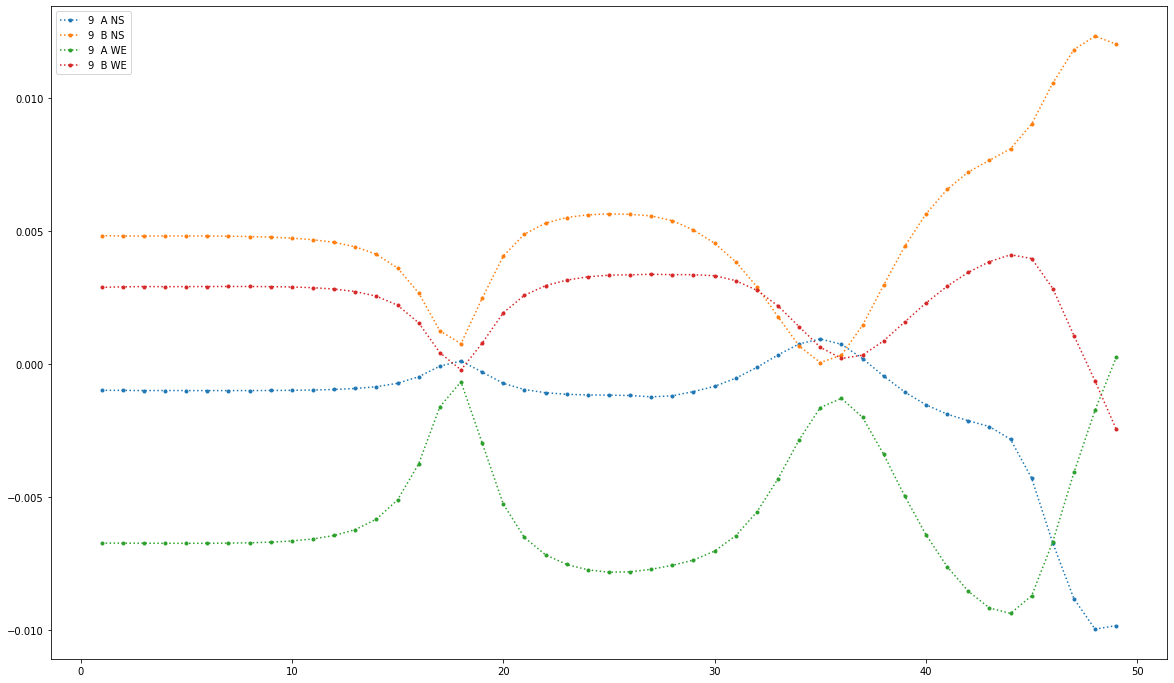

In [79]:
ts = np.array(ts)
OP_AA = np.array(OP_AA)
fig, ax = plt.subplots()
# ax.plot(np.mean(OP_AA.T,axis=0).real, label = str(D) + '  mean', marker='.', ls=':')
ax.plot((OP_AA.T[0].real - np.mean(OP_AA.T,axis=0).real) / (np.mean(OP_AA.T,axis=0).real), label = str(D) + '  A NS', marker='.', ls=':')
ax.plot((OP_AA.T[1].real - np.mean(OP_AA.T,axis=0).real) / (np.mean(OP_AA.T,axis=0).real), label = str(D) + '  B NS', marker='.', ls=':')
ax.plot((OP_AA.T[2].real - np.mean(OP_AA.T,axis=0).real) / (np.mean(OP_AA.T,axis=0).real), label = str(D) + '  A WE', marker='.', ls=':')
ax.plot((OP_AA.T[3].real - np.mean(OP_AA.T,axis=0).real) / (np.mean(OP_AA.T,axis=0).real), label = str(D) + '  B WE', marker='.', ls=':')
ax.legend()

In [54]:
OP_AA.T[0].shape

(5,)

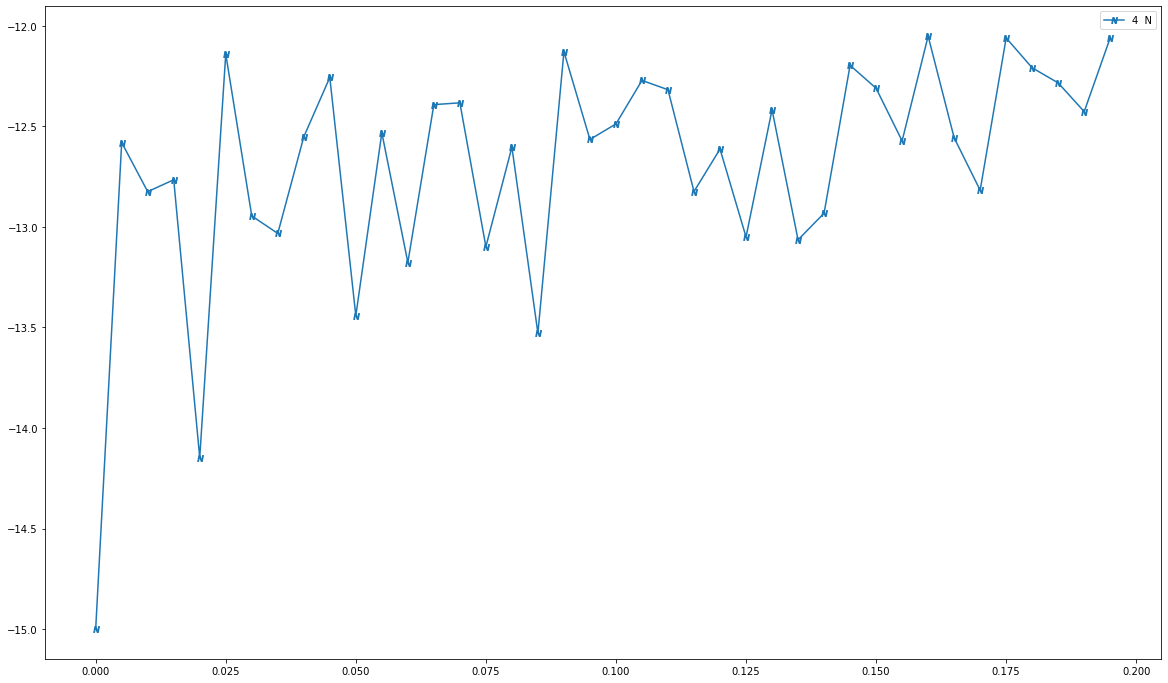

In [46]:
 fig, ax = plt.subplots()

colors = ['C'+str(x) for x in range(10)]
for n,dir in enumerate(dirs):
    ts, nA, nnA, nB, nnB, ctmerrs = [], [], [], [], [], []
    cor_aah_ns_A,cor_aha_ns_A,cor_aah_we_A,cor_aha_we_A=[],[],[],[]
    cor_aah_ns_B,cor_aha_ns_B,cor_aah_we_B,cor_aha_we_B=[],[],[],[]

    SPECS = dict(np.load(dir + '/SPECS.npz'))
    D = SPECS['D']
    for i in range(SPECS['n']):
        try:
            PEPS = dict(np.load(dir+'/PEPS_{:05}.npz'.format(i)))
            env = dict(np.load(dir+'/RHOA_{:05}.npz'.format(i)))
        except: continue
        if PEPS['iter'] * PEPS['dt'] > 0.5: break
        ts.append(PEPS['iter'] * PEPS['dt'])
        ctmerrs.append(env['error'])
    ts = np.array(ts)
    ctmerrs = np.array(ctmerrs)
    logctmerrs = np.log10(np.where(ctmerrs > 1e-15, ctmerrs, 1e-15))

    ax.errorbar(ts,logctmerrs, label = str(D) + '  N', marker='$N$',color=colors[n])
ax.legend()

array([0.        , 0.0009789 , 0.00390295, 0.00873576])

array([0.00000000e+00, 4.72519008e-07, 2.57815459e-06, 8.52438973e-06])

In [30]:
np.finfo(float).eps

2.220446049250313e-16